In [8]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = '/content/drive/Shared drives/670 final'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [11]:
df_original = pd.read_csv('UMich Dataset.csv')
df_original.head()

,id,quickadd,isclosed,amount,industry,title,salestype,daysopen,amount_bucket,meetingcount,sales_Department,PipelineQualityModel,Won_First_Opp,Months_Open,Partner_Flag,SDR_Opportunity,Opp_Created_Date,iswon
0,0062S00000vNnD1QAK,0,1,13770.0,Manufacturing,Senior Account Executive,N,31-60 Days,"10,000-",5,Outside Sales,Data Quality,1,1,0,1,2/26/2020,1
1,0062S00000vNPfCQAW,0,0,500.0,Wholesale Trade,Senior Account Executive,N,91+ Days,500,0,Outside Sales,Data Quality,0,9,0,1,2/6/2020,0
2,0062S00000vNPq0QAG,0,1,164.0,Retail Trade,Multimedia Specialist,A,0-30 Days,100-499,0,Other,Data Quality,1,0,0,0,2/6/2020,1
3,0062S00000vNPVHQA4,0,1,7718.0,Finance and Insurance,Regional Sales Manager,A,31-60 Days,"5,000-9,999",0,Outside Sales,Data Quality,1,1,0,0,2/6/2020,1
4,0062S00000vNQhiQAG,0,1,500.0,Manufacturing,Senior Account Executive,N,31-60 Days,500,0,Outside Sales,Data Quality,0,1,0,0,2/7/2020,0


# Data Exploration

In [12]:
df_original.shape

(57170, 18)

In [13]:
# we only explore the data whose opportunity has been closed (train set)
# Because we do not know the final outcome of the opportunity if the opportunity is still open.
df_orig = df_original[df_original.isclosed==1]

In [14]:
df_orig.describe(include='all')

,id,quickadd,isclosed,amount,industry,title,salestype,daysopen,amount_bucket,meetingcount,sales_Department,PipelineQualityModel,Won_First_Opp,Months_Open,Partner_Flag,SDR_Opportunity,Opp_Created_Date,iswon
count,45507,45507.000000,45507.0,44479.000000,45507,45507,45507,44236,44479,45507.000000,45507,45507,45507.000000,45507.000000,45507.000000,45507.000000,45507,45507.000000
unique,45507,NaN,NaN,NaN,22,47,2,4,7,NaN,5,3,NaN,NaN,NaN,NaN,888,NaN
top,0064400000sN0VeAAK,NaN,NaN,NaN,Manufacturing,Senior Account Executive,A,0-30 Days,0-99,NaN,Outside Sales,Data Quality,NaN,NaN,NaN,NaN,4/20/2018,NaN
freq,1,NaN,NaN,NaN,7590,21942,29845,25865,20880,NaN,29457,26443,NaN,NaN,NaN,NaN,121,NaN
mean,NaN,0.316874,1.0,797.877474,NaN,NaN,NaN,NaN,NaN,0.306458,NaN,NaN,0.558398,2.246226,0.294988,0.387457,NaN,0.580548
std,NaN,0.465263,0.0,4633.255884,NaN,NaN,NaN,NaN,NaN,0.804578,NaN,NaN,0.496583,5.051269,0.456042,0.487175,NaN,0.493475
min,NaN,0.000000,1.0,-24100.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,-586.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,0.000000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,0.000000,1.0,117.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000
75%,NaN,1.000000,1.0,500.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,3.000000,1.000000,1.000000,NaN,1.000000


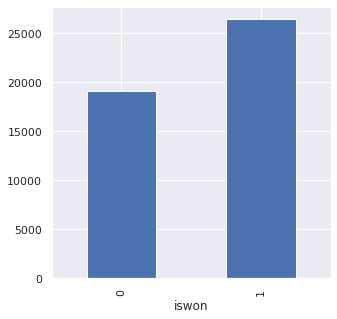

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
df_orig.groupby('iswon').size().plot(kind='bar')
xlabel = 'iswon'
ylabel = 'count'
plt.show()

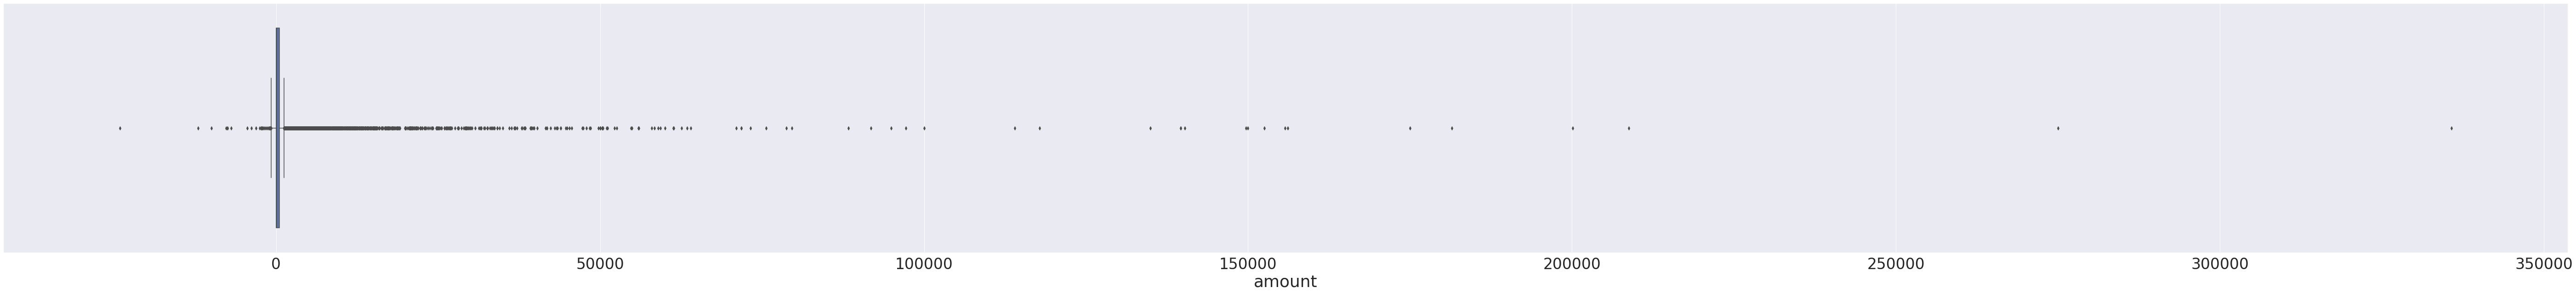

In [16]:
sns.set(rc={'figure.figsize':(100,10)})
sns.set(font_scale = 3)
sns.boxplot(df_orig['amount'])
plt.show()

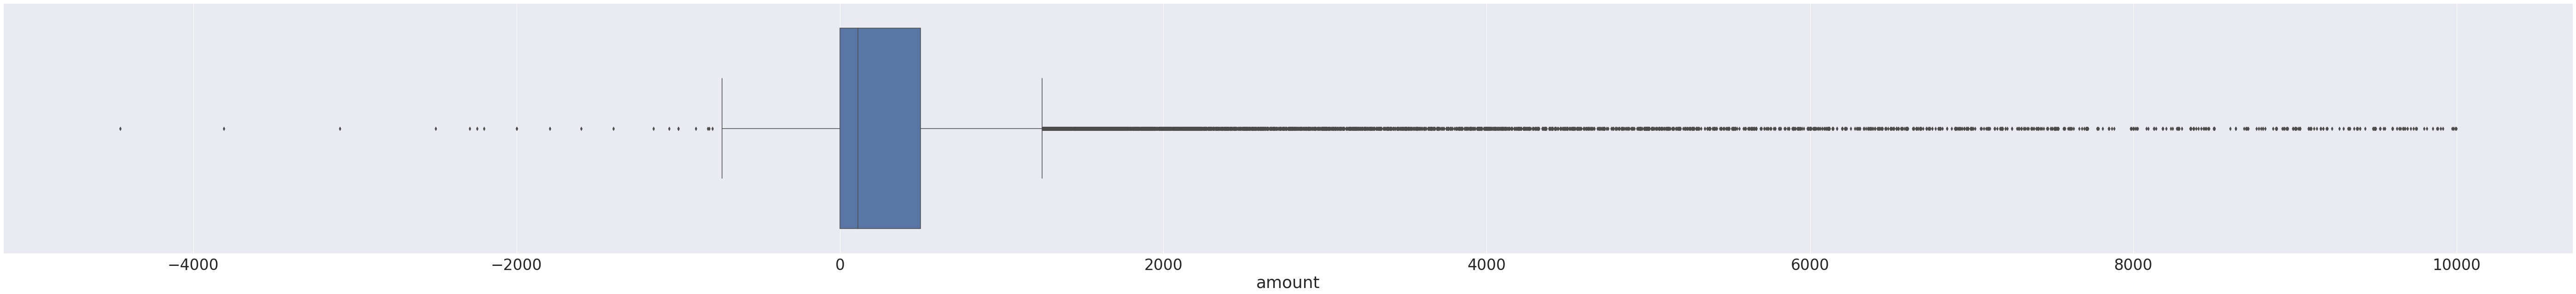

In [17]:
sns.set(rc={'figure.figsize':(100,10)})
sns.set(font_scale = 3)
sns.boxplot(df_orig[(df_orig.amount<10000)&(df_orig.amount>-5000)]['amount'])
plt.show()

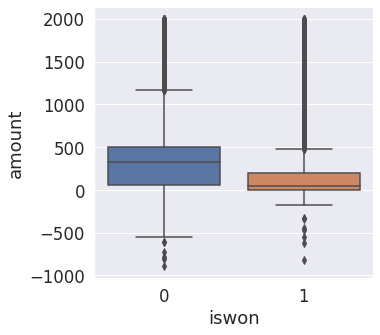

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1.5)
sns.boxplot(x='iswon',y='amount',data = df_orig[(df_orig.amount<2000)&(df_orig.amount>-1000)])
plt.show()
# Most opportunity is won when amount is less than 250

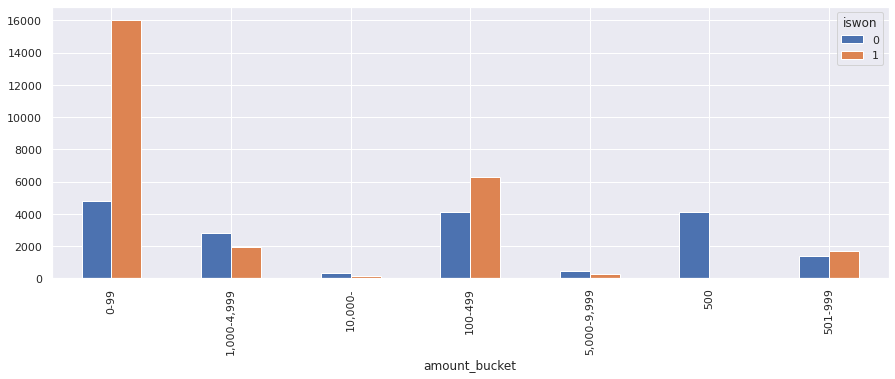

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['amount_bucket','iswon']).size().unstack().plot(kind='bar')
plt.show()

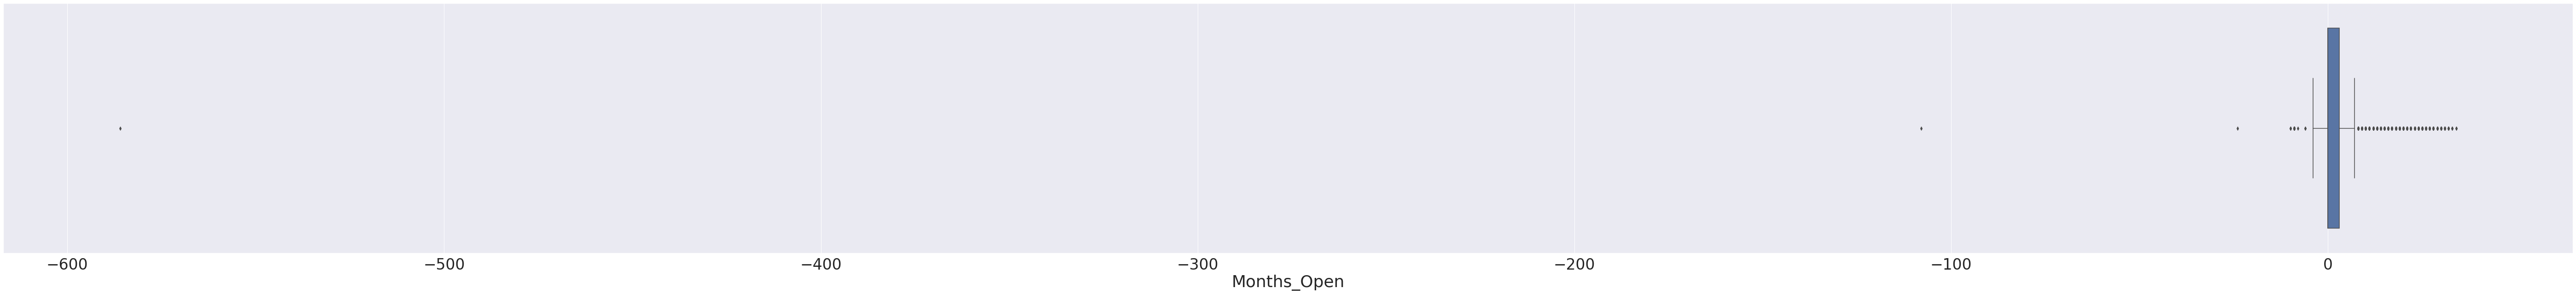

In [20]:
sns.set(rc={'figure.figsize':(100,10)})
sns.set(font_scale = 3)
sns.boxplot(df_orig['Months_Open'])
plt.show()

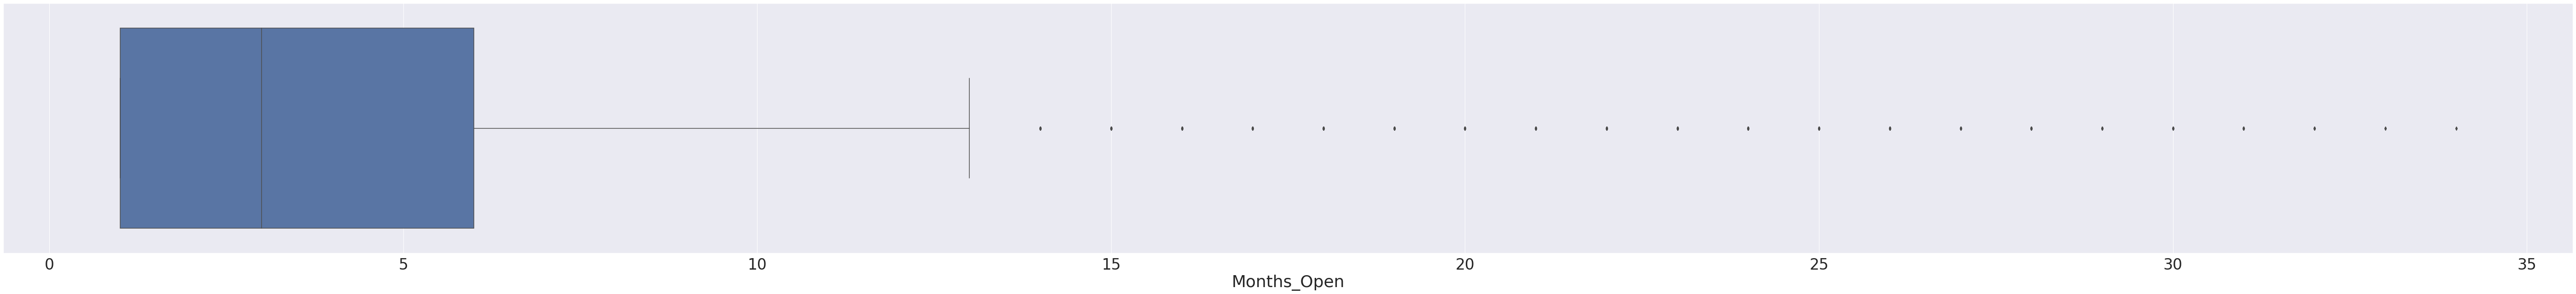

In [21]:
sns.set(rc={'figure.figsize':(100,10)})
sns.set(font_scale = 3)
sns.boxplot(df_orig[df_orig.Months_Open>0]['Months_Open'])
plt.show()

In [22]:
# why there is months with negative value?
df_orig[df_orig['Months_Open']<0].daysopen.unique()
# The daysopen are all nan

array([nan], dtype=object)

In [23]:
df_orig[df_orig['Months_Open']<0].shape

(407, 18)

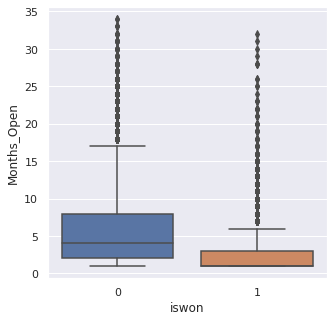

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
sns.boxplot(x='iswon',y='Months_Open',data = df_orig[df_orig.Months_Open>0])
plt.show()

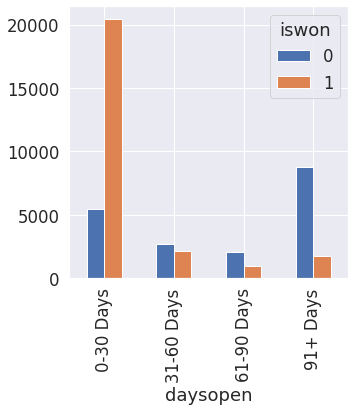

In [25]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1.5)
df_orig.groupby(['daysopen','iswon']).size().unstack().plot(kind='bar')
plt.show()
# Most opportunity is won in 30 days

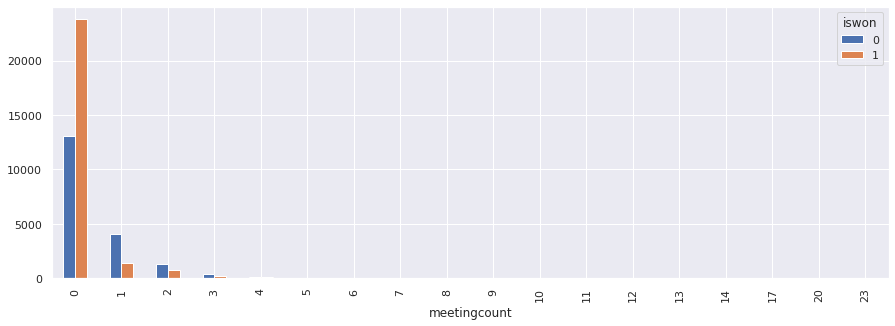

In [26]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['meetingcount','iswon']).size().unstack().plot(kind='bar')
plt.show()

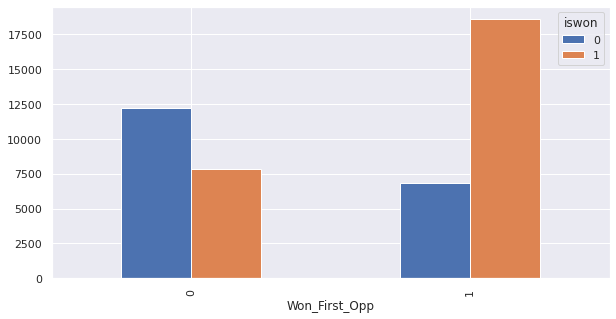

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set(font_scale = 1)
df_orig.groupby(['Won_First_Opp','iswon']).size().unstack().plot(kind='bar')
plt.show()

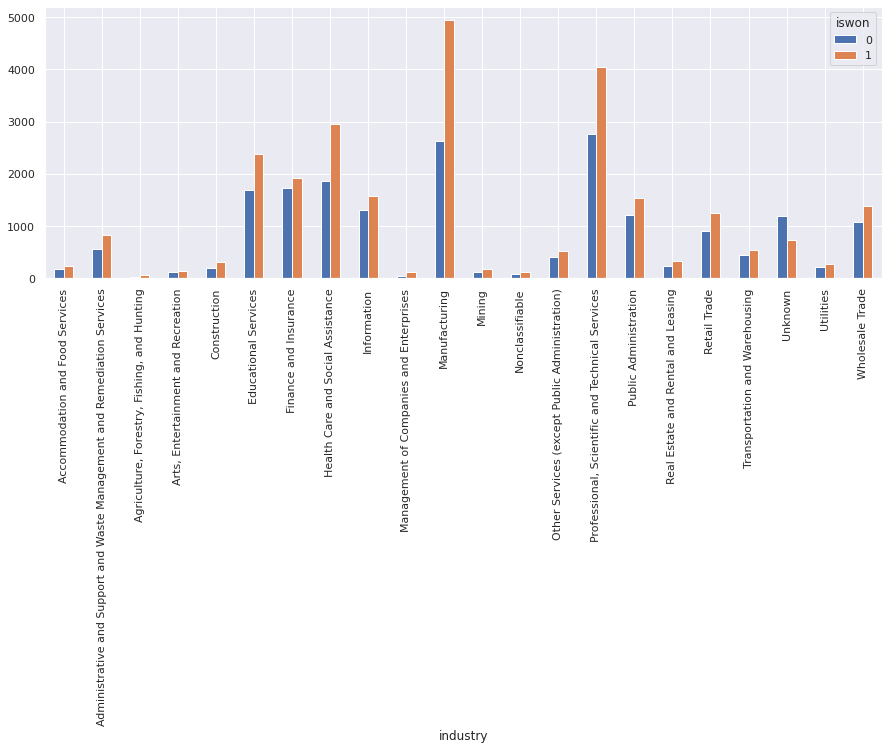

In [28]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['industry','iswon']).size().unstack().plot(kind='bar')
plt.show()
# df_orig.groupby('industry').size().sort_values().plot(kind='bar')
# plt.show()

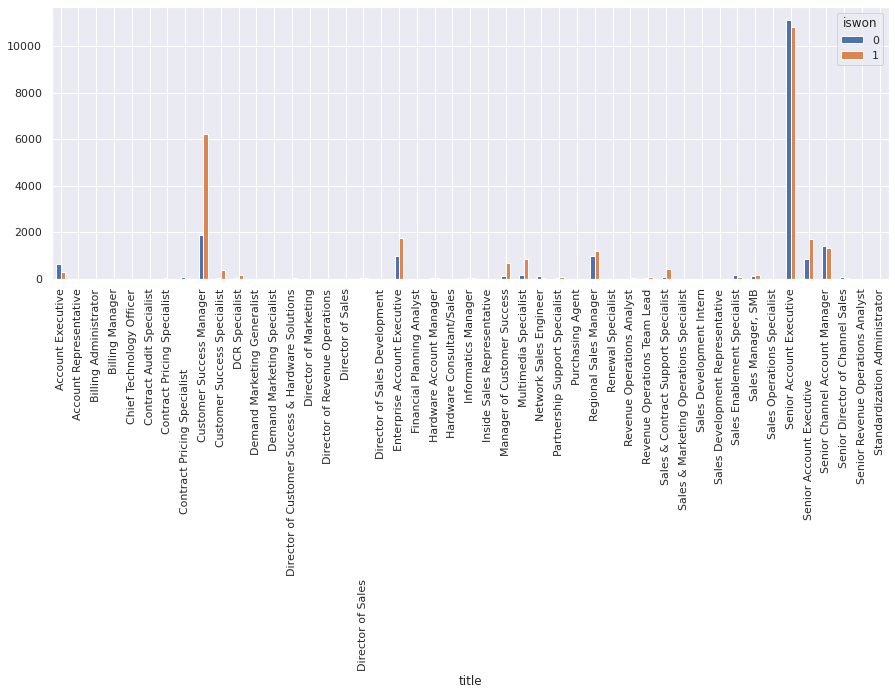

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['title','iswon']).size().unstack().plot(kind='bar')
plt.show()
# df_orig.groupby('title').size().sort_values().plot(kind='bar')
# plt.show()

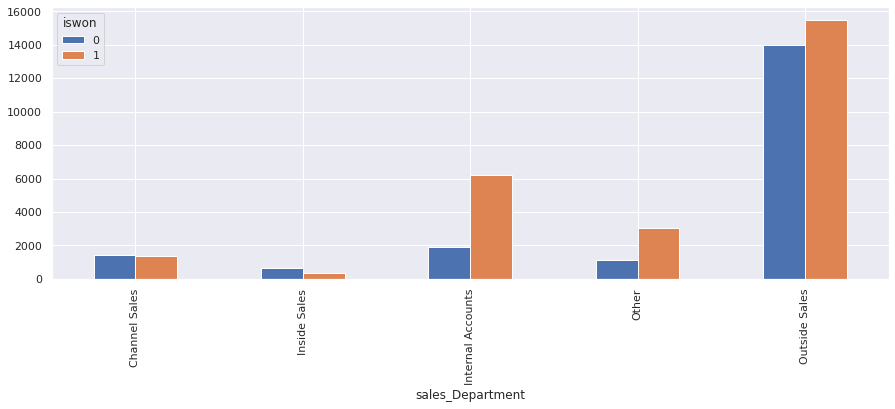

In [30]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['sales_Department','iswon']).size().unstack().plot(kind='bar')
plt.show()

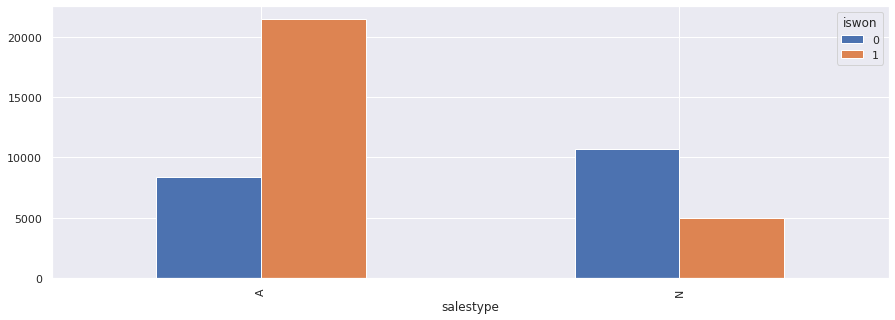

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['salestype','iswon']).size().unstack().plot(kind='bar')
plt.show()

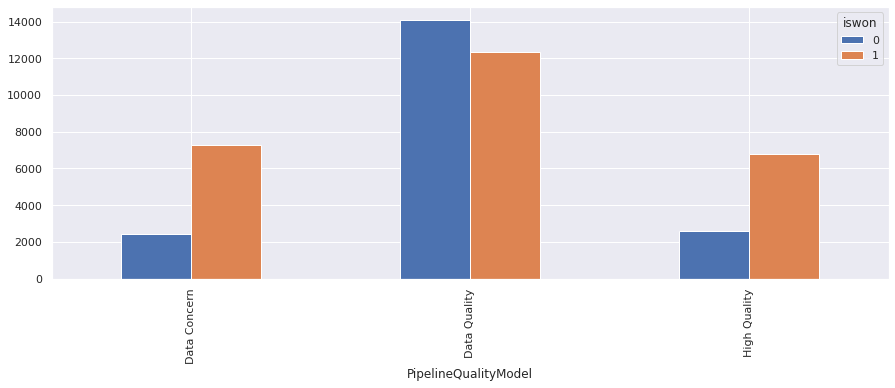

In [32]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
df_orig.groupby(['PipelineQualityModel','iswon']).size().unstack().plot(kind='bar')
plt.show()

In [33]:
# Check if the categorical features is related to service outcome by chi-squared test
ct = pd.crosstab(df_orig['iswon'], df_orig['sales_Department'],margins=False)
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  2211.0151780996525
p-val =  0.0
degree of freedom =  4


In [34]:
ct = pd.crosstab(df_orig['iswon'], df_orig['title'],margins=False)
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  3598.5838446463977
p-val =  0.0
degree of freedom =  46


In [35]:
ct = pd.crosstab(df_orig['iswon'], df_orig['industry'],margins=False)
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  607.6301238124197
p-val =  3.9718821954779335e-115
degree of freedom =  21


In [36]:
ct = pd.crosstab(df_orig['iswon'], df_orig['PipelineQualityModel'],margins=False)
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  3353.698619002401
p-val =  0.0
degree of freedom =  2


In [37]:
ct = pd.crosstab(df_orig['iswon'], df_orig['salestype'],margins=False)
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  6859.118874091666
p-val =  0.0
degree of freedom =  1


These categorical features are significantly associated with the outcome.

# Data cleaning and feature engineering

In [38]:
# on the whold dataset containing train and test datasets
df = df_original.drop(columns=['Opp_Created_Date']).copy().set_index('id')  # id and date is not included in the features

In [39]:
df.isna().sum()

quickadd                   0
isclosed                   0
amount                  2764
industry                   0
title                      0
salestype                  0
daysopen                1271
amount_bucket           2764
meetingcount               0
sales_Department           0
PipelineQualityModel       0
Won_First_Opp              0
Months_Open                0
Partner_Flag               0
SDR_Opportunity            0
iswon                      0
dtype: int64

In [40]:
# remove na
df.dropna(inplace=True)
# df.reset_index(inplace=True,drop=True)

In [41]:
df.shape

(53139, 16)

In [42]:
df[df.amount<=2000].shape[0]/df.shape[0]
# 92% amount are less than 2000

0.9241987993752234

In [43]:
df.daysopen.unique()

array(['31-60 Days', '91+ Days', '0-30 Days', '61-90 Days'], dtype=object)

In [44]:
daysopen_enc = OrdinalEncoder().fit(np.array(['0-30 Days','31-60 Days','61-90 Days','91+ Days']).reshape(-1,1))
df['daysopen'] = daysopen_enc.transform(df[['daysopen']])

In [45]:
df.amount_bucket.unique()

array(['10,000-', '500', '100-499', '5,000-9,999', '0-99', '1,000-4,999',
       '501-999'], dtype=object)

In [46]:
amount_bucket_enc = OrdinalEncoder().fit(np.array(['0-99','100-499','500','501-999','1,000-4,999','5,000-9,999','10,000-']).reshape(-1,1))
df['amount_bucket'] = amount_bucket_enc.transform(df[['amount_bucket']])

In [47]:
df['amount250'] = np.where(df.amount<250,1,0)  # if amount is smaller than 250
df['monthopen1'] = np.where(df.Months_Open<=1,1,0)

# df['amount500'] = np.where(df.amount>=500,0,1)
# df['monthopen3'] = np.where(df.Months_Open>3,0,1)

df['industry_selected'] = np.where(df.industry.isin(['Manufacturing', 'Professional, Scientific and Technical Services','Health Care and Social Assistance']),1,0)
df['title_selected']= np.where(df.title=='Customer Success Specialist',1,0)
df['sales_Department_selected'] = np.where(df.sales_Department=='Internal Accounts',1,0)
df['PipelineQualityModel_selected'] = np.where(df.PipelineQualityModel=='Data Quality',0,1)

In [48]:
def onehotenc(df_cat):
  enc = OneHotEncoder(handle_unknown='ignore').fit(df_cat)
  col_names = enc.get_feature_names(df_cat.columns)
  output = pd.DataFrame(enc.transform(df_cat).toarray(),columns=col_names)
  return output

def labelenc(df_cat):
  for col in df_cat.columns:
    df_cat[col] = LabelEncoder().fit_transform(df_cat[col])
  return df_cat

In [49]:
# df_cat = df[['industry','title','salestype','sales_Department','PipelineQualityModel']]  # 'industry','title',  ,'sales_Department','PipelineQualityModel'

# label encoder
df_cat = df[['industry','title','salestype','sales_Department','PipelineQualityModel']].copy()
df_cat = labelenc(df_cat)
df_num = df.drop(columns=['industry','title','salestype','sales_Department','PipelineQualityModel'])
# df_clean = pd.concat([df_num,onehotenc(df_cat)],axis=1)
df_clean = pd.concat([df_num,df_cat],axis=1)

In [50]:
corr_matrix = df_clean[df_clean.isclosed==1].corr()
corr_matrix.iswon.sort_values(ascending=False)

iswon                            1.000000
monthopen1                       0.532626
quickadd                         0.465481
amount250                        0.367865
Won_First_Opp                    0.333996
PipelineQualityModel_selected    0.273082
sales_Department_selected        0.177300
industry_selected                0.069673
title_selected                   0.059905
PipelineQualityModel            -0.024291
industry                        -0.036483
sales_Department                -0.079718
amount                          -0.088354
Partner_Flag                    -0.090559
SDR_Opportunity                 -0.096675
meetingcount                    -0.179397
title                           -0.185436
amount_bucket                   -0.326553
salestype                       -0.379895
Months_Open                     -0.449918
daysopen                        -0.544760
isclosed                              NaN
Name: iswon, dtype: float64

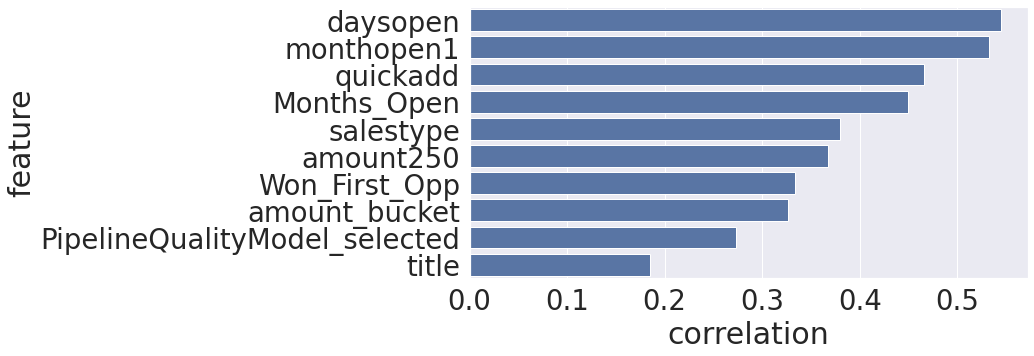

In [51]:
# The correlation (absolute value) of the features with iswon
corr_matrix = df_clean[df_clean.isclosed==1].corr()
temp1 = corr_matrix[['iswon']].sort_values(by='iswon',ascending=False)
temp1.drop(index=['iswon','isclosed'],inplace=True)
temp1['correlation'] = temp1['iswon'].apply(lambda x: abs(x))
temp1.reset_index(inplace=True)
temp1.rename(columns={'index':'feature'},inplace=True)

sns.set(rc={'figure.figsize':(10,5)})
sns.set(font_scale = 2.5)
sns_plot = sns.barplot(y="feature", x="correlation", data=temp1.sort_values(by='correlation',ascending=False).iloc[:10], color='b')  # top 10 important features
# plt.savefig("feature_importance.png")  # cannot save the whole image, part of the label text will lose
plt.show()
# sns_plot.figure.savefig("feature_importance.png")

# Use one machine learning model to predict the service outcome

In [52]:
df_train_val = df_clean[(df_clean['isclosed']==1)&(df_clean['amount']<2000)].drop(columns=['isclosed'])   # remove outliers whose amount is larger than 2000
# df_test = df_clean[df_clean['isclosed']==0].drop(columns='isclosed')

X_train_val = df_train_val.drop(columns='iswon')
y_train_val = df_train_val['iswon']

# X_test = df_test.drop(columns='iswon')

**Manual predict** the service outcome by opentime and amount because most success service (won) has opentime less than 1 month and the amount less than 250.

In [53]:
manual_pred = np.where((df_train_val['monthopen1']==1)&(df_train_val['amount250']==1),1,0)
manual_accuracy = accuracy_score(df_train_val['iswon'],manual_pred)
print(manual_accuracy)
# accuracy of manual prediction is 0.75

0.7501310501485235


## Compare the model performance and adjust the threshold

In [54]:
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,random_state=0)

In [55]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_val_scaled = mm_scaler.transform(X_val)

sd_scaler = StandardScaler()
X_train_scaled = sd_scaler.fit_transform(X_train_scaled)
X_val_scaled = mm_scaler.transform(X_val_scaled)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled,columns=X_val.columns)

In [56]:
def one_model(clf):
  clf.fit(X_train_scaled,y_train)
  pred_prob = clf.predict_proba(X_val_scaled)
  pred = clf.predict(X_val_scaled)
  accuracy_score = clf.score(X_val_scaled,y_val)
  print(accuracy_score)
  return accuracy_score,pred_prob,pred

In [57]:
# dummy classifier
clf = DummyClassifier(strategy='most_frequent')
acc_dummy,prob_dummy,pred_dummy = one_model(clf)

0.6049321086261981


In [58]:
def pred_adj(prob,pred_prob_list):
  # adjust the threshold determining the prediction
  pred_adj = [1 if x[1] > prob else 0 for x in pred_prob_list]
  accuracy_adj = accuracy_score(y_val,pred_adj)
  return accuracy_adj

def accuracy_plot(threshold_lst,pred_prob_list):
  # This function will draw an image showing the accuracy changing with the threshold
  accuracy_lst = []
  for prob in threshold_lst:
    accuracy = pred_adj(prob,pred_prob_list)
    accuracy_lst.append(accuracy)

  plt.plot(threshold_lst,accuracy_lst)
  plt.xlabel('threshold')
  plt.ylabel('accuracy')
  plt.show()

In [59]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1.5)

0.6049321086261981


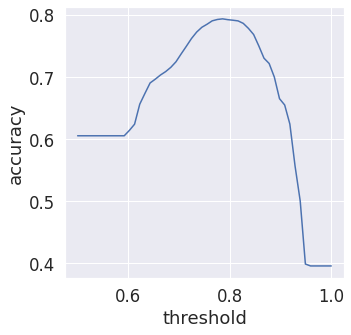

In [60]:
# logistic regression
clf = LogisticRegression()
acc_lr, pred_lr_p, pred_lr = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_lr_p)

0.6442691693290735


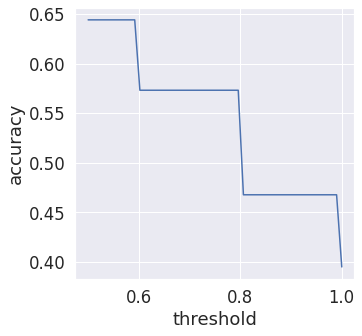

In [61]:
# Knn
clf = KNeighborsClassifier()
acc_knn, pred_knn_p,pred_knn = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_knn_p)

In [62]:
# calculate the accuracy of 0 and 1 seperatly
temp1 = pd.DataFrame({'y_val':y_val,
            'y_pred':pred_knn})
accu_0 = accuracy_score(temp1[temp1.y_val==0].y_val,temp1[temp1.y_val==0].y_pred)
accu_1 = accuracy_score(temp1[temp1.y_val==1].y_val,temp1[temp1.y_val==1].y_pred)
print(accu_0,accu_1)
# The accuracy of 1 is much higher than 0

0.1589588071771544 0.9612147219013039


In [63]:
# SVC
clf = SVC()
clf.fit(X_train_scaled,y_train)
pred_svc = clf.predict(X_val_scaled)
acc_svc = clf.score(X_val_scaled,y_val)
print(acc_svc)

0.6049321086261981


In [64]:
# clf.predict_proba(x_val_scaled) predict_proba is not available when probability=False

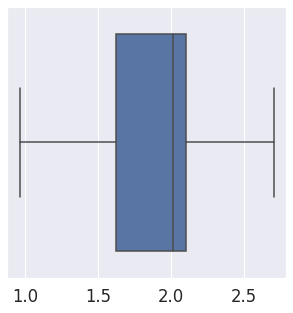

In [65]:
# try decision function
pred_svc_d = clf.decision_function(X_val_scaled)  # .predict_proba() does not work in SVC
sns.boxplot(pred_svc_d)
plt.show()

In [66]:
# decision function
def pred_adj_dec(dec,pred_dec_list):  # dec is the decision function threshold
  pred_adj = [1 if x > dec else 0 for x in pred_dec_list]
  accuracy_adj = accuracy_score(y_val,pred_adj)
  return accuracy_adj

def accuracy_plot_dec(threshold_lst,pred_dec_list):  # pred_dec_list: decision function list
  accuracy_lst = []
  for dec in threshold_lst:
    accuracy = pred_adj_dec(dec,pred_dec_list)
    accuracy_lst.append(accuracy)

  plt.plot(threshold_lst,accuracy_lst)
  plt.show()

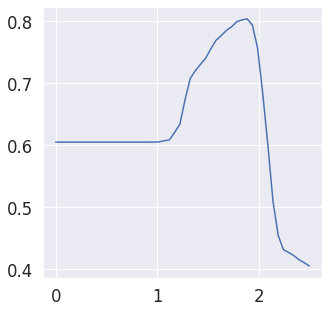

In [67]:
accuracy_plot_dec(np.linspace(0,2.5,50),pred_svc_d)

0.6234025559105432


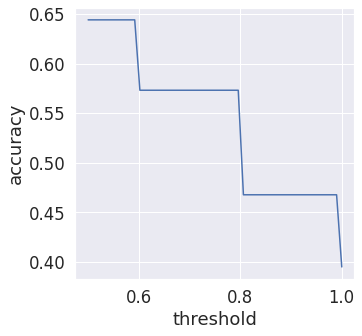

In [68]:
# Random Forest Classifier
clf = RandomForestClassifier()
acc_rf, pred_rf_p,pred_rf = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_knn_p)

In [69]:
temp1 = pd.DataFrame({'y_val':y_val,
            'y_pred':pred_rf})
accu_0 = accuracy_score(temp1[temp1.y_val==0].y_val,temp1[temp1.y_val==0].y_pred)
accu_1 = accuracy_score(temp1[temp1.y_val==1].y_val,temp1[temp1.y_val==1].y_pred)
print(accu_0,accu_1)

0.0859236795552186 0.9744182208285196


0.6072284345047924


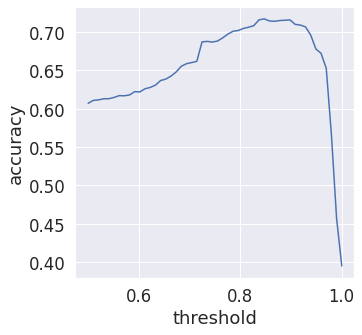

In [70]:
# MLP
clf = MLPClassifier()
acc_mlp, pred_mlp_p,pred_mlp = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_mlp_p)

0.716952875399361


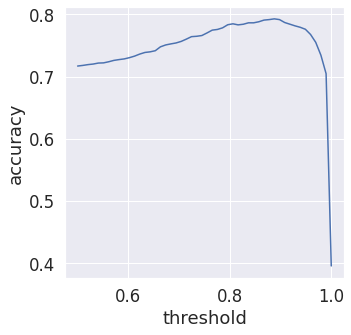

In [71]:
# Naive Bayes
clf = GaussianNB()
acc_nb, pred_nb_p,pred_nb = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_nb_p)

In [72]:
temp1 = pd.DataFrame({'y_val':y_val,
            'y_pred':pred_nb})
accu_0 = accuracy_score(temp1[temp1.y_val==0].y_val,temp1[temp1.y_val==0].y_pred)
accu_1 = accuracy_score(temp1[temp1.y_val==1].y_val,temp1[temp1.y_val==1].y_pred)
print(accu_0,accu_1)

0.30528177912560023 0.9858062386532431


0.6920926517571885


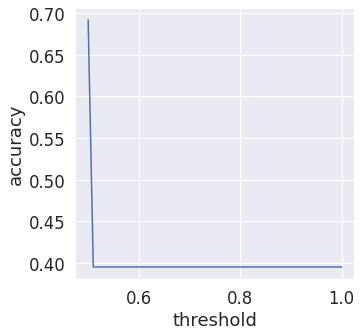

In [73]:
# Adaboost
clf = AdaBoostClassifier()
acc_ada, pred_ada_p,pred_ada = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_ada_p)

0.6920926517571885


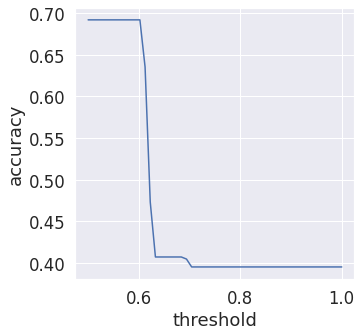

In [74]:
# GBDT
clf = GradientBoostingClassifier()
acc_gbdt, pred_gbdt_p,pred_gbdt = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_gbdt_p)

0.613917731629393


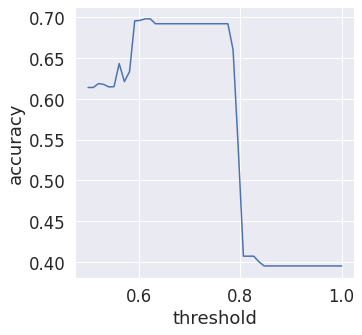

In [75]:
# Xgboost
clf = xgb.XGBClassifier()
acc_xg, pred_xg_p,pred_xg = one_model(clf)
accuracy_plot(np.linspace(0.5,1.0,50),pred_xg_p)

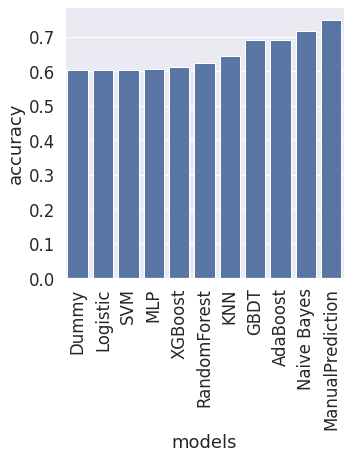

In [76]:
model_list1 = ['Dummy','Logistic','KNN','Naive Bayes','SVM','MLP','RandomForest','GBDT','AdaBoost','XGBoost','ManualPrediction']
one_acc_lst = [acc_dummy,acc_lr,acc_knn,acc_nb,acc_svc,acc_mlp,acc_rf,acc_gbdt,acc_ada,acc_xg,manual_accuracy]
acc_df1 = pd.DataFrame({'models':model_list1,'accuracy':one_acc_lst})
sns.barplot(x='models',y='accuracy',data=acc_df1.sort_values(by='accuracy'),color='b')
plt.xticks(rotation='vertical')
plt.show()

# Train two seperate machine learning models on the splitted dataset

In [77]:
df_train_val = df_clean[(df_clean['isclosed']==1)&(df_clean['amount']<2000)].drop(columns=['isclosed'])
# df_test = df_clean[df_clean['isclosed']==0].drop(columns='isclosed')
df_train,df_val = train_test_split(df_train_val,random_state=0)

# X_test = df_test.drop(columns='iswon')

In [78]:
def two_models(clf1,clf2):
  pipe1 = Pipeline([('scaler1', MinMaxScaler()),('scaler2', StandardScaler()), ('clf',clf1)])
  df_train_x_1 = df_train[df_train['amount250']==1].drop(columns='iswon')
  df_train_y_1 = df_train[df_train['amount250']==1][['iswon']]
  pipe1.fit(df_train_x_1,df_train_y_1)

  pipe2 = Pipeline([('scaler1', MinMaxScaler()),('scaler2', StandardScaler()), ('clf',clf2)])
  df_train_x_2 = df_train[df_train['amount250']!=1].drop(columns='iswon')
  df_train_y_2 = df_train[df_train['amount250']!=1][['iswon']]
  pipe2.fit(df_train_x_2,df_train_y_2)

  df_val_x_1 = df_val[df_val['amount250']==1].drop(columns='iswon')
  df_val_y_1 = df_val[df_val['amount250']==1][['iswon']]

  df_val_x_2 = df_val[df_val['amount250']!=1].drop(columns='iswon')
  df_val_y_2 = df_val[df_val['amount250']!=1][['iswon']]

  df_val_y = list(df_val_y_1.iswon.values)+list(df_val_y_2.iswon.values)
  df_val_y_pred = list(pipe1.predict(df_val_x_1))+list(pipe2.predict(df_val_x_2))
  overall_accuracy = accuracy_score(df_val_y,df_val_y_pred)
  print(overall_accuracy) # overall accuracy

  # seperated accuracy
  temp1 = pd.DataFrame({'y_val':df_val_y,
              'y_pred':df_val_y_pred})
  accu_0 = accuracy_score(temp1[temp1.y_val==0].y_val,temp1[temp1.y_val==0].y_pred)
  accu_1 = accuracy_score(temp1[temp1.y_val==1].y_val,temp1[temp1.y_val==1].y_pred)
  print(accu_0,accu_1)
  return overall_accuracy

In [79]:
# Dummy Classifier
two_acc_dummy = two_models(DummyClassifier(strategy='most_frequent'),DummyClassifier(strategy='most_frequent'))

0.7066693290734825
0.5706343189284812 0.7955108103647467


In [80]:
# SVC
two_acc_svc = two_models(SVC(),SVC())

0.8222843450479234
0.730098559514784 0.8824888595477801


In [81]:
# RF
two_acc_rf = two_models(RandomForestClassifier(),RandomForestClassifier())

0.8274760383386581
0.7730603992923932 0.863013698630137


In [82]:
# Adaboost
two_acc_ada = two_models(AdaBoostClassifier(),AdaBoostClassifier())

0.8229832268370607
0.7371746272428608 0.879022941079386


In [83]:
# GBDT
two_acc_gbdt = two_models(GradientBoostingClassifier(),GradientBoostingClassifier())

0.8392571884984026
0.7573919636087946 0.8927215712163723


In [84]:
# XGBoost
two_acc_xg = two_models(xgb.XGBClassifier(),xgb.XGBClassifier())

0.8397563897763578
0.7644680313368714 0.8889255652747978


In [85]:
# MLP
two_acc_mlp = two_models(MLPClassifier(),MLPClassifier())

0.8228833865814696
0.7402072276977508 0.8768773725037134


In [86]:
# Naive bayes
two_acc_nb = two_models(GaussianNB(),GaussianNB())

0.797823482428115
0.7313621430376548 0.8412279254002311


In [87]:
# Knn
two_acc_knn = two_models(KNeighborsClassifier(),KNeighborsClassifier())

0.8079073482428115
0.7321202931513773 0.8574022115860703


In [88]:
# Logistic regression
two_acc_lr = two_models(LogisticRegression(),LogisticRegression())

0.8114017571884984
0.7030578721253475 0.8821587720745998


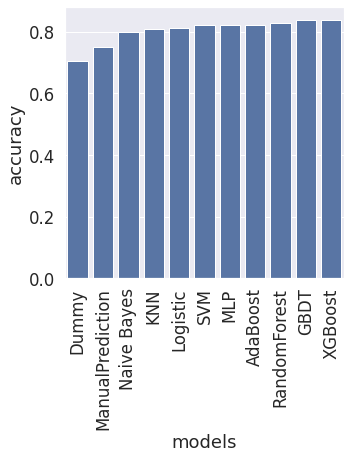

In [89]:
model_list2 = ['Dummy','Logistic','KNN','Naive Bayes','SVM','MLP','RandomForest','GBDT','AdaBoost','XGBoost','ManualPrediction']
two_acc_lst = [two_acc_dummy,two_acc_lr,two_acc_knn,two_acc_nb,two_acc_svc,two_acc_mlp,two_acc_rf,two_acc_gbdt,two_acc_ada,two_acc_xg,manual_accuracy]
acc_df2 = pd.DataFrame({'models':model_list2,'accuracy':two_acc_lst})

sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1.5)
sns.barplot(x='models',y='accuracy',data=acc_df2.sort_values(by='accuracy'),color='b')
plt.xticks(rotation='vertical')
plt.show()

In [90]:
data=acc_df2.sort_values(by='accuracy',ascending=False)
data

,models,accuracy
9,XGBoost,0.839756
7,GBDT,0.839257
6,RandomForest,0.827476
8,AdaBoost,0.822983
5,MLP,0.822883
4,SVM,0.822284
1,Logistic,0.811402
2,KNN,0.807907
3,Naive Bayes,0.797823
10,ManualPrediction,0.750131


## Parameter tuning

In [91]:
# GBDT
n_estimators_lst = [100,150,200,250]
min_samples_leaf_lst = [1,5,8]
max_depth_lst = [3,5,7,10]

acc_gbdt_best = 0
n_estimators_best = 0
min_samples_leaf_best = 0
max_depth_best = 0
for n_estimator in n_estimators_lst:
  for min_samples_leaf in min_samples_leaf_lst:
    for max_depth in max_depth_lst:
      clf1 = GradientBoostingClassifier(n_estimators=n_estimator,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
      clf2 = GradientBoostingClassifier(n_estimators=n_estimator,min_samples_leaf=min_samples_leaf,max_depth=max_depth)  # must define clf1 and clf2 seperately, else the score is low
      acc_gbdt_tune = two_models(clf1,clf2)
      if acc_gbdt_tune > acc_gbdt_best:
        acc_gbdt_best = acc_gbdt_tune
        n_estimators_best = n_estimator
        min_samples_leaf_best = min_samples_leaf
        max_depth_best = max_depth
print(acc_gbdt_best)
print(n_estimators_best)
print(min_samples_leaf_best)
print(max_depth_best)

0.8392571884984026
0.7573919636087946 0.8927215712163723
0.8445487220447284
0.7685114986100581 0.8942069648456841
0.8444488817891374
0.769775082132929 0.8932167024261429
0.8352635782747604
0.7637098812231489 0.8819937283380096
0.8415535143769968
0.7591609805408137 0.8953622710018155
0.8479432907348243
0.7733131159969674 0.8966826208945371
0.8457468051118211
0.7710386656557998 0.8945370523188645
0.8392571884984026
0.7682587819054839 0.8856246905429939
0.8403554313099042
0.7591609805408137 0.8933817461627331
0.8466453674121406
0.774323982815264 0.8938768773725038
0.8465455271565495
0.7715440990649481 0.8955273147384056
0.8366613418530351
0.7664897649734648 0.8824888595477801
0.84185303514377
0.7599191306545363 0.8953622710018155
0.847444089456869
0.771291382360374 0.8971777521043076
0.8429512779552716
0.7664897649734648 0.8928866149529625
0.8372603833865815
0.7705332322466515 0.8808384221818782
0.8428514376996805
0.7594136972453879 0.8973427958408978
0.8475439297124601
0.7730603992923932

In [92]:
# XGBoost
n_estimators_lst = [100,150,200]
min_child_weight_lst = [6,8,10]
max_depth_lst = [3,5,6]

acc_xg_best = 0
n_estimators_best = 0
min_child_weight_best = 0
max_depth_best = 0

for n_estimators in n_estimators_lst:
  for min_child_weight in min_child_weight_lst:
    for max_depth in max_depth_lst:
      clf1 = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight)
      clf2 = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight)
      acc_xg_tune = two_models(clf1,clf2)
      if acc_xg_tune > acc_xg_best:
        acc_xg_best = acc_xg_tune
        n_estimators_best = n_estimators
        min_child_weight_best = min_child_weight
        max_depth_best = max_depth
print(acc_xg_best)
print(n_estimators_best)
print(min_child_weight_best)
print(max_depth_best)

0.8390575079872205
0.7624462977002779 0.889090609011388
0.8466453674121406
0.7748294162244125 0.8935467898993233
0.847444089456869
0.7715440990649481 0.8970127083677174
0.8395567092651757
0.7611827141774071 0.89074104637729
0.8465455271565495
0.7750821329289866 0.8932167024261429
0.8465455271565495
0.7710386656557998 0.895857402211586
0.8396565495207667
0.7601718473591105 0.891566265060241
0.8454472843450479
0.77710386656558 0.8900808714309292
0.8471445686900958
0.7740712661106899 0.8948671397920449
0.8423522364217252
0.7647207480414455 0.8930516586895527
0.849241214057508
0.7768511498610058 0.8965175771579469
0.8480431309904153
0.7735658327015416 0.8966826208945371
0.8422523961661342
0.7624462977002779 0.8943720085822743
0.8470447284345048
0.7778620166793025 0.8922264400066018
0.8469448881789138
0.7725549658832449 0.8955273147384056
0.8423522364217252
0.765478898155168 0.8925565274797821
0.8481429712460063
0.78013646702047 0.8925565274797821
0.8470447284345048
0.7758402830427091 0.893

## Predict the test data using XGBoost classifier

In [93]:
df_train_val = df_clean[(df_clean['isclosed']==1)&(df_clean['amount']<2000)].drop(columns=['isclosed'])
df_test = df_clean[df_clean['isclosed']==0].drop(columns='isclosed')
# df_train,df_val = train_test_split(df_train_val,random_state=0)

X_test = df_test.drop(columns='iswon')

In [94]:
# train on all train_val data
clf1 = xgb.XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=6)
clf2 = xgb.XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=6)

pipe1 = Pipeline([('scaler1', MinMaxScaler()),('scaler2', StandardScaler()), ('clf',clf1)])
df_train_val_x_1 = df_train_val[df_train_val['amount250']==1].drop(columns='iswon')
df_train_val_y_1 = df_train_val[df_train_val['amount250']==1][['iswon']]
pipe1.fit(df_train_val_x_1,df_train_val_y_1)

pipe2 = Pipeline([('scaler1', MinMaxScaler()),('scaler2', StandardScaler()), ('clf',clf2)])
df_train_val_x_2 = df_train_val[df_train_val['amount250']!=1].drop(columns='iswon')
df_train_val_y_2 = df_train_val[df_train_val['amount250']!=1][['iswon']]
pipe2.fit(df_train_val_x_2,df_train_val_y_2)

X_test_1 = X_test[X_test['amount250']==1]
X_test_2 = X_test[X_test['amount250']!=1]

X_test_1['iswon'] = pipe1.predict(X_test_1)
X_test_2['iswon'] = pipe2.predict(X_test_2)

In [95]:
X_test_outcome = pd.concat([X_test_1,X_test_2],axis=0).reset_index()
df_output = df_original[df_original.isclosed==0].copy()
df_output.isna().sum() # test data has missing values

id                         0
quickadd                   0
isclosed                   0
amount                  1736
industry                   0
title                      0
salestype                  0
daysopen                   0
amount_bucket           1736
meetingcount               0
sales_Department           0
PipelineQualityModel       0
Won_First_Opp              0
Months_Open                0
Partner_Flag               0
SDR_Opportunity            0
Opp_Created_Date           0
iswon                      0
dtype: int64

In [96]:
df_output = df_output.merge(X_test_outcome[['id','iswon']],on='id',how='left')
df_output.to_csv('output.csv',index=False)